In [4]:
import matplotlib.pyplot as plt
from pymongo import DESCENDING

from database import DATABASE_NAME, CollectionStatistics

CATEGORY = "Python"

In [5]:
collection_statistics = CollectionStatistics
collection_statistics.database_name = DATABASE_NAME
with CollectionStatistics() as collection_stats:
    # Find the last document.
    cursor = collection_stats.collection.find({"category": CATEGORY}).sort("to_datetime", DESCENDING).limit(1)
    statistics = next(iter(cursor))
statistics

{'_id': ObjectId('684d5879b9221bdf703c964c'),
 'category': 'Python',
 'from_datetime': '2025-05-15T14:09:20.945138+03:00',
 'to_datetime': '2025-06-14T14:09:20.945138+03:00',
 'technology_frequency': {'Python': 533,
  'AI': 277,
  'API': 163,
  'Docker': 152,
  'Django': 143,
  'APIs': 130,
  'AWS': 126,
  'PostgreSQL': 120,
  'FastAPI': 119,
  'CI/CD': 95,
  'SQL': 82,
  'Kubernetes': 80,
  'REST': 77,
  'Git': 74,
  'Azure': 72,
  'DevOps': 69,
  'Flask': 61,
  'Redis': 60,
  'LLM': 53,
  'Celery': 48,
  'RESTful API': 43,
  'React': 42,
  'MongoDB': 41,
  'NoSQL': 39,
  'RabbitMQ': 37,
  'MySQL': 36,
  'Linux': 33,
  'OpenAI': 32,
  'Kafka': 32,
  'LLMs': 30,
  'GCP': 29,
  'SQLAlchemy': 28,
  'JavaScript': 28,
  'Science': 25,
  'Github': 25,
  'Google': 25,
  'NLP': 23,
  'ORM': 23,
  'DRF': 23,
  'RAG': 22,
  'LangChain': 21,
  'Pandas': 21,
  'PyTorch': 20,
  'Unix': 19,
  'S3': 18,
  'ElasticSearch': 18,
  'TypeScript': 18,
  'GraphQL': 17,
  'Pytest': 17,
  'TensorFlow': 17},


/tmp/ipykernel_1279161/3010464977.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), rotation=90)


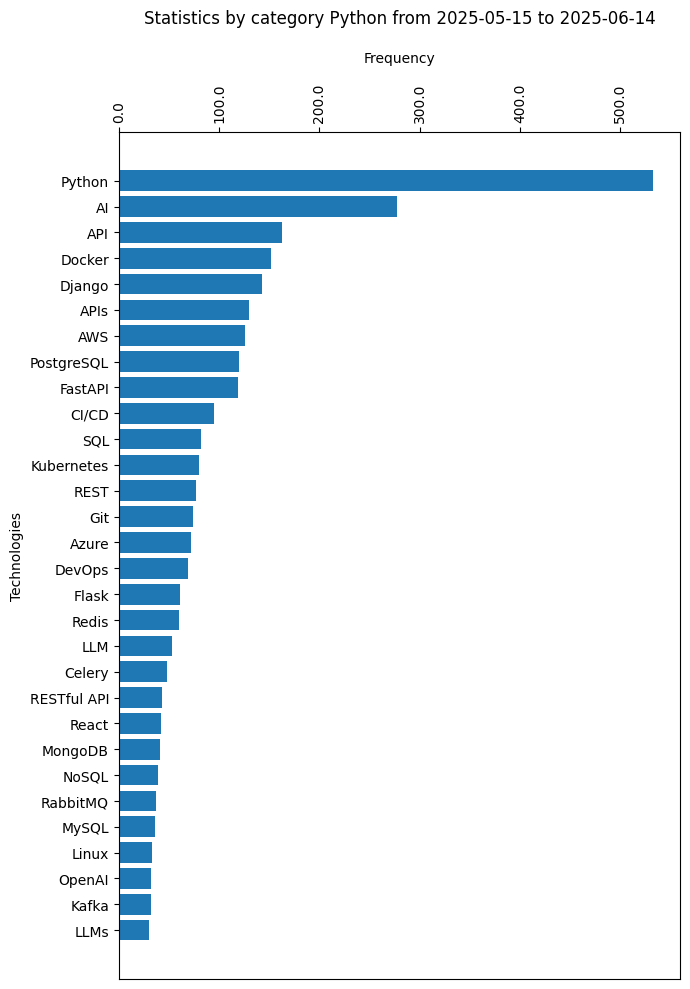

In [34]:
# Limit to top 30 technologies
elements_number = min(len(statistics["technology_frequency"]), 30)
technology_frequency = dict(list(statistics["technology_frequency"].items())[:elements_number])

# Plot title
title = (
    f"Statistics by category {statistics['category']} from {statistics['from_datetime'][:10]} "
    f"to {statistics['to_datetime'][:10]}"
)

# Create figure and axis
fig, ax = plt.subplots(figsize=(7, 10))

# Horizontal bar chart (reversing order to display highest value at top)
ax.barh(list(technology_frequency.keys())[::-1], list(technology_frequency.values())[::-1])

# Title
ax.set_title(title, pad=20)

# Move x-axis label to top
ax.set_xlabel("Frequency", labelpad=15)
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()

# Y-axis label
ax.set_ylabel("Technologies")

# Adjust tick labels
ax.tick_params(axis="x", top=True, labeltop=True, bottom=False, labelbottom=False)
ax.set_xticklabels(ax.get_xticks(), rotation=90)

# Tight layout for better spacing
fig.tight_layout()